<a href="https://colab.research.google.com/github/georgievw/ML/blob/main/yandex.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# B. Канатная дорога

In [ ]:
def distance(first_mount, second_mount):
  dl = second_mount[0] - first_mount[0]
  dh = second_mount[1] - first_mount[1]
  return (dl**2 + dh**2)**(1/2)

In [ ]:
def all_len(mountains):
  l = 0
  stack = []
  null_mount = [0, 0]
  mountains.insert(0, null_mount)
  for i in range(1, len(mountains)):
    l += distance(mountains[i-1], mountains[i])
    while (len(stack) != 0 ) and (stack[-1][1] <= mountains[i][1]): 
      l += distance(stack[-1], mountains[i])
      stack.pop()
    if mountains[i-1][1] > mountains[i][1]:
       stack.append(mountains[i-1])
  return l

In [ ]:
n = int(input())
mountains = []
for i in range(n):
  entered_list = input().split()
  num_list = list(map(int, entered_list))
  mountains.append(num_list)
mountains 

5
1 1
1 0
 2 0
2 1
3 1


[[1, 1], [1, 0], [2, 0], [2, 1], [3, 1]]

In [ ]:
mountains = [[3, 2], [5, 1], [7, 4], [9, 3], [11, 7], [12, 1]]

In [ ]:
all_len(mountains)

31.710272946224936

# Е. Тайна египетских пирамид
Найти коэффициенты a, b, c, d по известным парам аргумент-значение: 


f(x)=a∗tg(x) + (b∗sin(x) + c∗cos(x))^2 + d∗sqrt(x)

In [184]:
import math
import matplotlib.pyplot as plt
import numpy as np
data = [[0.5, 7.11], [1.0, 6.69], [1.5, 4.97], [2.0, 4.25], [2.5, 5.75], [3.0, 8.58],
[3.5, 10.56], [4.0, 10.26], [4.5, 8.32], [5.0, 6.86], [5.5, 7.54], [6.0, 10.04], [6.5, 12.35],
[7.0, 12.62], [7.5, 10.88], [8.0, 8.97], [8.5, 8.91], [9.0, 10.99], [9.5, 13.53], [10.0, 14.42]]
data = np.array(data)

In [211]:
class MyEgyptRegression():

  def mse(self, y_pred, y):
    return np.mean(np.square(y - y_pred))
  
  def f(self, x, w):
    x_ = x.copy().reshape(-1)
    return np.array([np.tan(x_), (1 - np.cos(2*x_))/2, np.sin(2*x_)/2, (1 + np.cos(2*x_))/2, np.sqrt(x_)]).T.dot(w)

  def draw(self, weights=np.array([[0], [1], [4], [4], [3]])):
    plt.scatter(X_batch, y_batch)
    plt.plot(np.arange(X_batch.min(), X_batch.max(), 0.01),self.f(np.arange(X_batch.min(), X_batch.max(), 0.01), weights))
    plt.plot(np.arange(X_batch.min(), X_batch.max(), 0.01),self.predict(self.x_transform(np.arange(X_batch.min(), X_batch.max(), 0.01))))
    plt.show()

  def x_transform(self, x):
    x_ = x.copy().reshape(-1)
    return np.array([np.tan(x_), (1 - np.cos(2*x_))/2, np.sin(2*x_)/2, (1 + np.cos(2*x_))/2, np.sqrt(x_)]).T

  def fit(self, X_batch, y_batch, learning_rate=0.01, n_epochs=10000):
    mse_store = []
    self.weights = np.zeros((5, 1))
    X_batch = self.x_transform(X_batch)
    y_batch = y_batch.reshape(-1, 1)
    for i in range(n_epochs):
      mse_store.append(self.mse(self.predict(X_batch), y_batch))
      self.weights -= learning_rate*self.mse_gradient_w(self.predict(X_batch), y_batch, X_batch).reshape(5,1)
      
    print(self.weights)
    print(mse_store[-1])
    plt.plot(np.arange(0, len(mse_store), 1), np.array(mse_store))
    plt.show()

  def mse_gradient_w(self, y_pred, y, x):
    return -2 * np.mean( ((y - y_pred) * x) , axis=0)

  def predict(self, X_batch):
    return (X_batch.dot(self.weights))

[[1.48999906e-04]
 [9.96396257e-01]
 [3.99793641e+00]
 [3.99774312e+00]
 [3.00085266e+00]]
4.814693466853666e-06


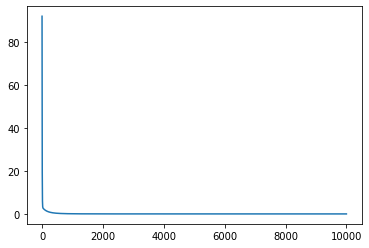

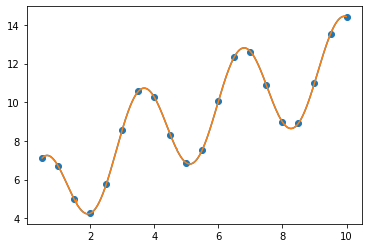

In [199]:
X_batch = data[:,0]
y_batch = data[:,1]
reg = MyEgyptRegression()
reg.fit(X_batch, y_batch)
reg.draw()

[[ 0.1002398 ]
 [ 1.00116063]
 [ 9.9982928 ]
 [24.99987162]
 [-1.00011709]]
1.8242532244143135e-07


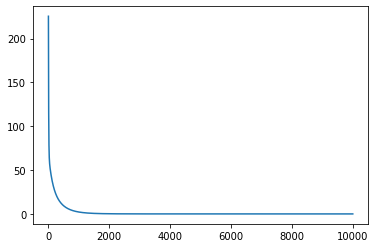

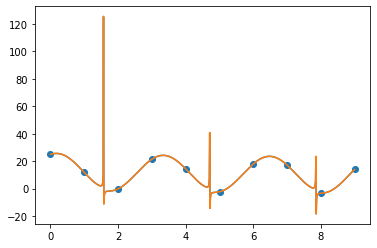

In [212]:
test = MyEgyptRegression()
X_batch = np.arange(0, 10)
weights = np.array([[0.1], [1], [10], [25], [-1]])
y_batch = test.f(X_batch, weights)
y_batch

test.fit(X_batch, y_batch)
test.draw(weights)

# A. Ковид

In [182]:
n = 4
is_sick = [1, 0, 0, 0]
humans = [[2, 1, 2], [2, 2, 3], [2, 3, 4], [1, 4]]

In [ ]:
n = int(input())
is_sick = list(map(int, input().split()))
humans = []
for i in range(n):
  humans.append(list(map(int, input().split())))

In [183]:
sicked = [i for i in range(len(is_sick)) if is_sick[i] == 1]
sicked = set(sicked)

meetings = dict()
for i in range(len(humans)):
  if humans[i][0] != 0:
    for j in range(1, len(humans[i])):
      if meetings.get(humans[i][j]) is None:
        meetings[humans[i][j]] = {i}
      else:
        meetings[humans[i][j]].add(i)

meetings_num = sorted(list(meetings))
for meeting in meetings_num:
  if len(meetings.get(meeting) & sicked) != 0 :
    sicked = sicked.union(meetings.get(meeting))

a = ' '.join(map(str, sicked))
output_list = [1 if i in sicked else 0 for i in range(len(is_sick))]
print(' '.join(map(str, output_list)))

1 1 1 1


# С. Оптимальная константа
Дла выборки из файла "input.txt" найти:

*   Константу, минимизирую MSE на входной выборке.
*   Константу, минимизирую MAE на входной выборке.
*   Константу, минимизирую MAPE на входной выборке.





In [180]:
import numpy as np
import matplotlib.pyplot as plt

class Optimizer():

  def fit(self, name="input.txt"):
    values = []
    with open(name, "r") as f:
      for line in f:
        values.append(int(line.strip()))
    values.pop(0)
    values.sort()
    self.values = np.array(values)
    print(self.values)

  def predict(self):
    self.constant = {}
    self.constant["MSE"] = self.values.mean()
    self.constant["MAE"] = np.median(self.values)
    reverse_values = np.ones(len(self.values))/self.values
    m = reverse_values.sum()/2
    for i in range(len(self.values)):
      if reverse_values[0:i+1].sum() > m:
        self.constant["MAPE"] = self.values[i]
        break
    return self.constant

  def MSE(self, C):
    return np.mean(np.square(self.values - C))

  def MAE(self, C):
    return np.mean(np.abs(self.values - C))

  def MAPE(self, C):
    return np.mean(np.abs((self.values - C)/self.values))

  def draw(self,):
    xs = np.arange(self.values.min() - 1, self.values.max() + 1, 0.01)
    ys_mse = []
    ys_mae = []
    ys_mape = []
    for x in xs:
      ys_mse.append(self.MSE(x))
      ys_mae.append(self.MAE(x))
      ys_mape.append(self.MAPE(x))
    
    fig = plt.figure(figsize=(12,12))
    ax_mse = fig.add_subplot(3, 1, 1) 
    ax_mae = fig.add_subplot(3, 1, 2)
    ax_mape = fig.add_subplot(3, 1, 3)
    ax_mse.set(title="MSE") 
    ax_mae.set(title="MAE") 
    ax_mape.set(title="MAPE") 

    ax_mse.plot(xs, np.array(ys_mse))
    ax_mae.plot(xs, np.array(ys_mae))
    ax_mape.plot(xs, np.array(ys_mape))   
    ax_mse.scatter(self.constant.get('MSE'), self.MSE(self.constant.get('MSE')))
    ax_mae.scatter(self.constant.get('MAE'), self.MAE(self.constant.get('MAE')))
    ax_mape.scatter(self.constant.get('MAPE'), self.MAPE(self.constant.get('MAPE')))
    plt.show()
    print("min_MSE/predicted_MSE = ", np.array(ys_mse).min()," / ", self.MSE(self.constant.get('MSE')) )
    print("min_MAE/prdecited_MAE = ", np.array(ys_mae).min(), " / ", self.MAE(self.constant.get('MAE')))
    print("min_MAPE/predcited_MAPE = ", np.array(ys_mape).min(), " / ", self.MAPE(self.constant.get('MAPE')) )
    print(self.constant)

[  1   2   2   3   6  10  14 100]


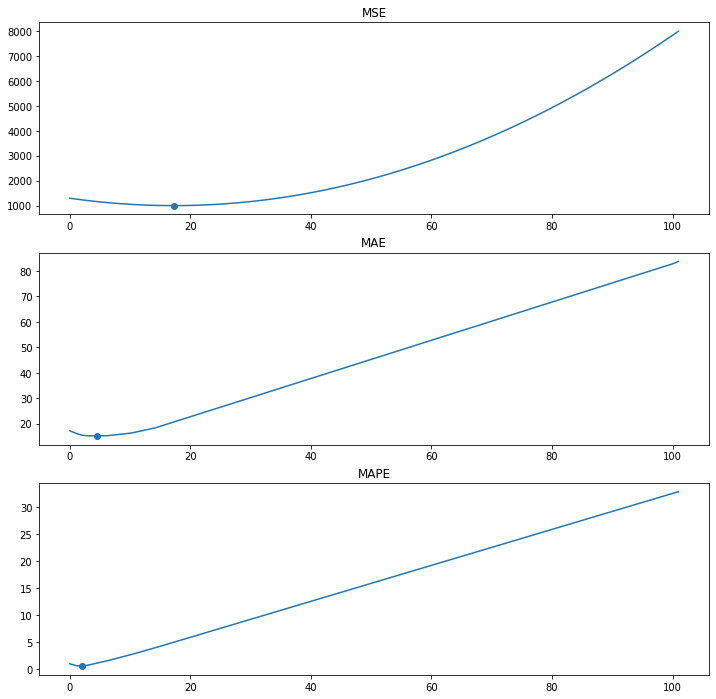

min_MSE/predicted_MSE =  996.1875  /  996.1875
min_MAE/prdecited_MAE =  15.249999999999998  /  15.25
min_MAPE/predcited_MAPE =  0.5796428571428571  /  0.5796428571428571
{'MSE': 17.25, 'MAE': 4.5, 'MAPE': 2}


In [181]:
opt = Optimizer()
opt.fit()
opt.predict()
opt.draw()